In [1]:
import cv2
import matplotlib.pyplot as plt
import torch
from torch import nn
from torchvision import transforms,datasets
from torch.utils.data import DataLoader
import numpy as np
from torch import optim

%matplotlib inline

# Loading and transforming the data

In [137]:
w = 128
h = 128
classes = 2

transform = transforms.Compose([
    transforms.Resize((w,h)),
  #  transforms.RandomRotation(30),
  #  transforms.RandomVerticalFlip(0.3),
  #  transforms.RandomHorizontalFlip(),
   # transforms.RandomResizedCrop(int(w)),
    transforms.ToTensor()])

train_data = datasets.ImageFolder("./DogsCats/train",transform=transform)
test_data = datasets.ImageFolder("./DogsCats/test",transform=transform)

In [138]:
train_loader = DataLoader(train_data,batch_size=64,shuffle=True)
test_loader = DataLoader(test_data,batch_size=128,shuffle=False)

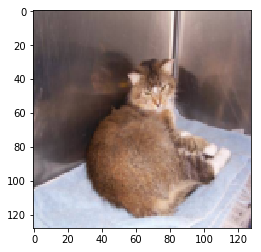

In [139]:
images,labels = next(iter(train_loader))
plt.imshow(np.rollaxis(images[0].numpy(), 0, 3))

# Creating the model

In [158]:
model = nn.Sequential(
nn.Conv2d(in_channels=3,out_channels=32,kernel_size=3), #OutDim = (128 - 3)/1 +1 = (3,32,126,126)
nn.ReLU(),
nn.MaxPool2d(kernel_size=2,stride=2), #OutDim 126/2 = (3,32,63,63)
    
nn.Conv2d(in_channels=32,out_channels=64,kernel_size=3), #Out Dim = (63-3)/1 +1 = 61 ,
nn.ReLU(),
nn.MaxPool2d(kernel_size=2,stride=2), #OutDim 61/2 = 30,
nn.Dropout(0.25),
    
nn.Conv2d(in_channels=64,out_channels=128,kernel_size=3), #Out Dim = (30-3)/1 +1 = 28 ,
nn.ReLU(),
nn.MaxPool2d(kernel_size=2,stride=2), #OutDim 28/2 = 14,
             
nn.Conv2d(in_channels=128,out_channels=256,kernel_size=3), #Out Dim = (14-3)/1 +1 = 12 ,
nn.ReLU(),
nn.MaxPool2d(kernel_size=2,stride=2), #OutDim 12/2 = 6
nn.Dropout(0.25),

nn.Flatten(),
#nn.Dropout(0.5),
nn.Linear(in_features=256*6*6,out_features=2),
nn.LogSoftmax()
)

In [159]:
# model = nn.Sequential(
# nn.Conv2d(in_channels=3,out_channels=32,kernel_size=3), #OutDim = (128 - 3)/1 +1 = (3,32,126,126)
# nn.ReLU(),
# nn.MaxPool2d(kernel_size=2,stride=2), #OutDim 126/2 = (3,32,63,63)

# nn.Flatten(),
# nn.Linear(in_features=32*63*63,out_features=2),
# nn.LogSoftmax()
# )

In [160]:
output = model.forward(images)
output.max(dim=1)[1]

C:\ProgramData\Anaconda3\lib\site-packages\torch\nn\modules\container.py:117: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# Training The Model

In [161]:
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(),lr = 0.0001)

In [162]:
from sklearn.metrics import accuracy_score

def calc_test_accuracy():
    accuracies = []
    losses = []
    with torch.no_grad():
        for images,labels in iter(test_loader):
            output = model.forward(images)
            accuracies.append(accuracy_score(labels,output.max(dim =1)[1]))
            loss = criterion(output,labels)
            losses.append(loss.item())
    return np.mean(accuracies),np.mean(losses)

In [164]:
epochs = 6
print_every = 20
steps = 0

for e in range(epochs):
    running_loss = 0
    for images,labels in iter(train_loader):
        steps+= 1
        optimizer.zero_grad()
        output = model.forward(images)
        loss = criterion(output,labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        
        if steps % print_every == 0:
            print("Epoch: {}/{}... ".format(e+1, epochs),
                  "Loss: {:.4f}".format(running_loss/print_every))
            
            running_loss = 0
    test_acc,test_loss = calc_test_accuracy()
    print("Testing set accuracy: " + str(test_acc) +", Testing set loss:" + str(test_loss))

Epoch: 1/6...  Loss: 0.6305
Epoch: 1/6...  Loss: 0.6278
Epoch: 1/6...  Loss: 0.6236
Epoch: 1/6...  Loss: 0.6225
Epoch: 1/6...  Loss: 0.6126
Epoch: 1/6...  Loss: 0.6221
Epoch: 1/6...  Loss: 0.6323
Epoch: 1/6...  Loss: 0.6331
Epoch: 1/6...  Loss: 0.6162
Epoch: 1/6...  Loss: 0.5999
Epoch: 1/6...  Loss: 0.6201
Epoch: 1/6...  Loss: 0.6003
Epoch: 1/6...  Loss: 0.6133
Epoch: 1/6...  Loss: 0.5812
Epoch: 1/6...  Loss: 0.5873
Epoch: 1/6...  Loss: 0.5954
Testing set accuracy: 0.6978352864583333, Testing set loss:0.5787224285304546
Epoch: 2/6...  Loss: 0.3275
Epoch: 2/6...  Loss: 0.5797
Epoch: 2/6...  Loss: 0.5775
Epoch: 2/6...  Loss: 0.5665
Epoch: 2/6...  Loss: 0.5877
Epoch: 2/6...  Loss: 0.5642
Epoch: 2/6...  Loss: 0.5616
Epoch: 2/6...  Loss: 0.5428
Epoch: 2/6...  Loss: 0.5686
Epoch: 2/6...  Loss: 0.5722
Epoch: 2/6...  Loss: 0.5829
Epoch: 2/6...  Loss: 0.5690
Epoch: 2/6...  Loss: 0.5547
Epoch: 2/6...  Loss: 0.5479
Epoch: 2/6...  Loss: 0.5608
Epoch: 2/6...  Loss: 0.5257
Testing set accuracy: 0.70

RuntimeError: [enforce fail at ..\c10\core\CPUAllocator.cpp:72] data. DefaultCPUAllocator: not enough memory: you tried to allocate 25690112 bytes. Buy new RAM!